# Modelado Estocástico

## Clase 1 - Mixtura (Ejercicio 2)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Datos:
- Columna 1: $[-8;8]$ en intervalos de 0.1
- Columna 2: Probability Density Function de una Normal estándar.   $f(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$
- Columna 3: PDF de una Normal con Media -1.5 y Varianza 4.    $g(x) = \frac{1}{\sqrt{8\pi}}e^{-\frac{(x+1.5)^2}{8}}$
- Columna 4: PDF de una _mixture_ de dos normales.
    - Peso normal estándar 1: 0.75
    - Peso normal estándar 2: 0.25
    
    $\frac{3}{4}\cdot\frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} + \frac{1}{4}\cdot\frac{1}{\sqrt{8\pi}}e^{-\frac{(x+1.5)^2}{8}}$

In [2]:
w1 = 0.75
mu1 = 0
var1 = 1

w2 = 0.25
mu2 = 1.5
var2 = 4

col_1 = np.arange(-8, 8.05, 0.1)
df = pd.DataFrame({'z': col_1})
df.head()

,z
0,-8.0
1,-7.9
2,-7.8
3,-7.7
4,-7.6


### Comparo diferentes formas de implementación del cálculo de la pdf de la Normal estándar.

In [3]:
df_compare = pd.DataFrame(df)
df_compare['pdf_normal_stats'] = stats.norm.pdf(df['z'])
df_compare['pdf_normal'] = np.exp(-df['z']**2/2)/np.sqrt(2*np.pi)
df_compare['pdf_pandas'] = df['z'].apply(lambda x: np.exp(-x**2/2)/np.sqrt(2*np.pi))
df_compare

,z,pdf_normal_stats,pdf_normal,pdf_pandas
0,-8.0,5.052271e-15,5.052271e-15,5.052271e-15
1,-7.9,1.118796e-14,1.118796e-14,1.118796e-14
2,-7.8,2.452855e-14,2.452855e-14,2.452855e-14
3,-7.7,5.324148e-14,5.324148e-14,5.324148e-14
4,-7.6,1.144156e-13,1.144156e-13,1.144156e-13
...,...,...,...,...
156,7.6,1.144156e-13,1.144156e-13,1.144156e-13
157,7.7,5.324148e-14,5.324148e-14,5.324148e-14
158,7.8,2.452855e-14,2.452855e-14,2.452855e-14
159,7.9,1.118796e-14,1.118796e-14,1.118796e-14


### Completo mi dataframe con las 4 columnas pedidas

In [4]:
df['pdf_normal'] = stats.norm.pdf(df['z'])
df['pdf_m15_v4'] = stats.norm.pdf(df['z'], loc=-1.5, scale=2)
df['pdf_mixt'] = w1 * df['pdf_normal'] + w2 * df['pdf_m15_v4']
df


,z,pdf_normal,pdf_m15_v4,pdf_mixt
0,-8.0,5.052271e-15,0.001015,2.536310e-04
1,-7.9,1.118796e-14,0.001192,2.980110e-04
2,-7.8,2.452855e-14,0.001397,3.492823e-04
3,-7.7,5.324148e-14,0.001633,4.083524e-04
4,-7.6,1.144156e-13,0.001905,4.762203e-04
...,...,...,...,...
156,7.6,1.144156e-13,0.000006,1.593417e-06
157,7.7,5.324148e-14,0.000005,1.267607e-06
158,7.8,2.452855e-14,0.000004,1.005898e-06
159,7.9,1.118796e-14,0.000003,7.962282e-07


### Gráfico de las Normales

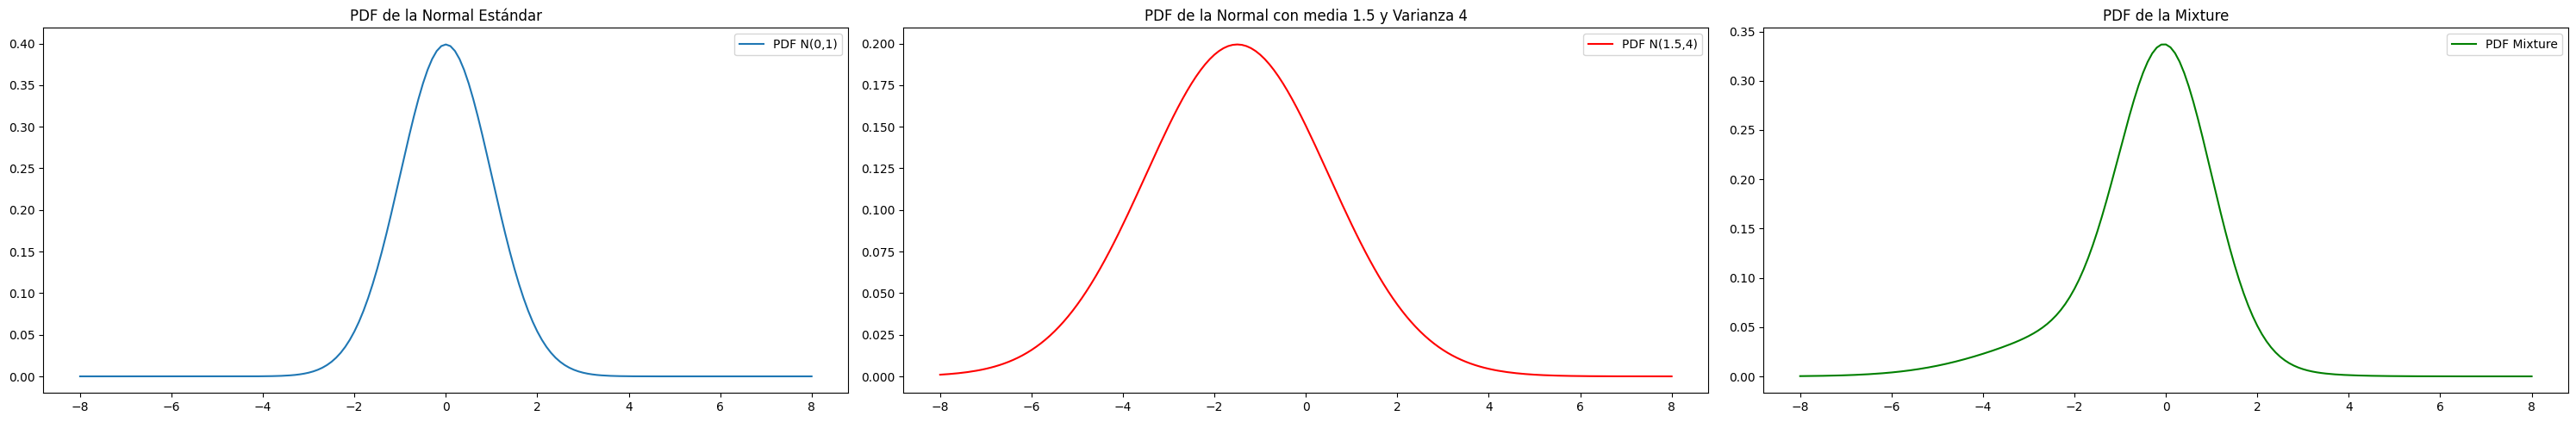

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

axes[0].plot(df['z'], df['pdf_normal'], label='PDF N(0,1)')
axes[0].set_title('PDF de la Normal Estándar')
axes[0].legend()

axes[1].plot(df['z'], df['pdf_m15_v4'], label='PDF N(1.5,4)', color='red')
axes[1].set_title('PDF de la Normal con media 1.5 y Varianza 4')
axes[1].legend()

axes[2].plot(df['z'], df['pdf_mixt'], label='PDF Mixture', color='green')
axes[2].set_title('PDF de la Mixture')
axes[2].legend()

plt.tight_layout()

plt.show()

In [6]:
#Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

#Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

#Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

#Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis total (no en exceso)
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)

print("Media:", mu_mix)
print("Varianza:", round(var_mix,5))
print("Tercer momento μ₃:", round(mu_3,5))
print("Cuarto momento μ₄:",   round(mu_4,5))
print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))

Media: 0.375
Varianza: 2.17188
Tercer momento μ₃: 2.84766
Cuarto momento μ₄: 22.89185
Asimetría: 0.88968
Kurtosis: 4.85301
